# Covid19 Visualizations

In [1]:
# import packages
import pandas as pd
import json
import requests

In [2]:
# download data provided by https://www.covid19india.org/ site  

response = requests.get('https://api.covid19india.org/data.json')
data = response.json()

# write the data into a json file

with open('covid19.json', 'w') as jsonfile:
  json.dump(data, jsonfile)

In [3]:
# read the data from a json file


with open('covid19.json', 'r') as j:
    json_data = json.load(j)

# extract time series data from the file and store in time_series_data
time_series_data = json_data['cases_time_series']

In [4]:
# Create data frame from timeseries json data
import pandas as pd
df = pd.DataFrame(time_series_data)
df.shape

(75, 7)

In [5]:
df.dtypes

dailyconfirmed    object
dailydeceased     object
dailyrecovered    object
date              object
totalconfirmed    object
totaldeceased     object
totalrecovered    object
dtype: object

In [6]:
df.head(5)

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0


In [7]:
df['date'] = df['date'].apply(lambda dt : pd.to_datetime(dt + '2020', format='%d %B %Y'))
df.head(5)

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,2020-01-30,1,0,0
1,0,0,0,2020-01-31,1,0,0
2,0,0,0,2020-02-01,1,0,0
3,1,0,0,2020-02-02,2,0,0
4,1,0,0,2020-02-03,3,0,0


In [8]:
cols = ['dailyconfirmed','dailydeceased','dailyrecovered','totalconfirmed','totaldeceased','totalrecovered']

for col in cols:
    df[[col]] = df[[col]].apply(pd.to_numeric)

df.dtypes



dailyconfirmed             int64
dailydeceased              int64
dailyrecovered             int64
date              datetime64[ns]
totalconfirmed             int64
totaldeceased              int64
totalrecovered             int64
dtype: object

In [9]:
df = df.set_index('date')
df.head(5)

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
date,,,,,,
2020-01-30,1,0,0,1,0,0
2020-01-31,0,0,0,1,0,0
2020-02-01,0,0,0,1,0,0
2020-02-02,1,0,0,2,0,0
2020-02-03,1,0,0,3,0,0


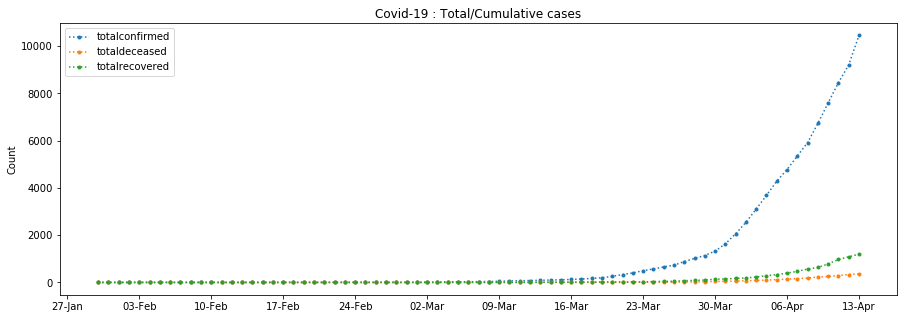

In [22]:
# Plot Cumulative cases

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,5))
cols = ['totalconfirmed','totaldeceased','totalrecovered']
for col in cols:
    ax.plot(df[col], label=col,  linestyle=':', marker='.')

    ax.legend()
    ax.set_ylabel('Count')
    ax.set_title('Covid-19 : Total/Cumulative cases');
    
    # Format x-tick labels as 3-letter month name and day number
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'));
    
    # Set x-axis major ticks to weekly interval, on Mondays
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

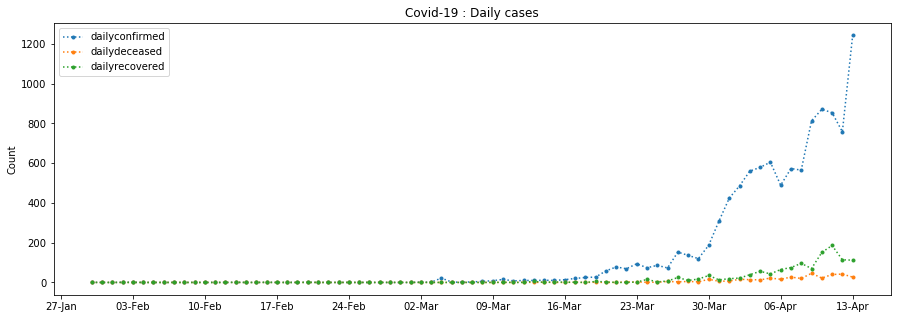

In [23]:
# Plot daily cases

fig, ax = plt.subplots(figsize=(15,5))
cols = ['dailyconfirmed','dailydeceased','dailyrecovered']
for col in cols:
    ax.plot(df[col], label=col,  linestyle=':', marker='.')

    ax.legend()
    ax.set_ylabel('Count')
    ax.set_title('Covid-19 : Daily cases');
    
    # Format x-tick labels as 3-letter month name and day number
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'));
    
    # Set x-axis major ticks to weekly interval, on Mondays
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))